In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data=np.loadtxt("train2_32.csv",delimiter=',',dtype=str)
train_data=train_data[1:,:]

train_data=train_data.astype(np.float64)

col_len=np.shape(train_data)[1]-1
X_train=train_data[:,:col_len]
Y_train=train_data[:,-1]

In [3]:
X_train_mean=[]
prob_train=[]

x1=y1=len1=0
x2=y2=len2=0
x3=y3=len3=0

for i in range(len(train_data)):
    if Y_train[i]==0:
        x1+=X_train[i][0]
        y1+=X_train[i][1]
        len1+=1
    elif Y_train[i]==1:
        x2+=X_train[i][0]
        y2+=X_train[i][1]
        len2+=1
    else:
        x3+=X_train[i][0]
        y3+=X_train[i][1]
        len3+=1

X_train_mean.append(np.array([x1/len1 , y1/len1]))
prob_train.append(len1/len(train_data))

X_train_mean.append(np.array([x2/len2 , y2/len2]))
prob_train.append(len2/len(train_data))

X_train_mean.append(np.array([x3/len3 , y3/len3]))
prob_train.append(len3/len(train_data))

np.asarray(X_train_mean)
np.asarray(prob_train)

print(X_train_mean)

[array([ 4.4517105 , 19.92998966]), array([19.2743483 , 15.94361256]), array([-23.62451219,   9.63966234])]


In [4]:
Testdata=np.loadtxt("test2_32.csv",delimiter=',',dtype=str)
Testdata=Testdata[1:,:]

Testdata=Testdata.astype(np.float64)

col_len=np.shape(Testdata)[1]-1
X_test=Testdata[:,:col_len]
Y_test=Testdata[:,-1]

In [5]:
X_test_mean=[]
prob_test=[]

x1=y1=len1=0
x2=y2=len2=0
x3=y3=len3=0

for i in range(len(Testdata)):
    if Y_test[i]==0:
        x1+=X_test[i][0]
        y1+=X_test[i][1]
        len1+=1
    elif Y_test[i]==1:
        x2+=X_test[i][0]
        y2+=X_test[i][1]
        len2+=1
    else:
        x3+=X_test[i][0]
        y3+=X_test[i][1]
        len3+=1

X_test_mean.append(np.array([x1/len1 , y1/len1]))
prob_test.append(len1/len(Testdata))

X_test_mean.append(np.array([x2/len2 , y2/len2]))
prob_test.append(len2/len(Testdata))

X_test_mean.append(np.array([x3/len3 , y3/len3]))
prob_test.append(len3/len(Testdata))

np.asarray(X_test_mean)
np.asarray(prob_test)

print(X_test_mean)

[array([ 4.57945847, 19.73777018]), array([18.86777335, 15.7461274 ]), array([-21.75711358,   9.48338265])]


In [6]:
def covariance_matrix(data):
    mean_arr=np.mean(data,axis=0)
    # axis=0 along column
    cov_mat=np.zeros((data.shape[1],data.shape[1]))
    
    for i in range(data.shape[0]):
        diff=data[i,:]-mean_arr
        cov_mat+=np.outer(diff,diff)
    cov_mat /= data.shape[0]
    return cov_mat

In [7]:
def naive_bayes_prob(x,mu,sigma,prior):
    ex=np.exp(-0.5 * np.dot(np.dot((x-mu),np.linalg.inv(sigma)),(x-mu).T))
    det=np.linalg.det(sigma)
    norm_const=1.0 / (np.power((2 * np.pi), x.shape[0] / 2) * np.power(det,0.5))
    return norm_const * ex * prior

In [8]:
def naive_bayes_predict(x,p):
    
    sigma_train=covariance_matrix(X_train)
    sigma_test=covariance_matrix(X_test)
    
    if p==0:
        prob1=naive_bayes_prob(x,X_train_mean[0],sigma_train,prob_train[0]) 
        prob2=naive_bayes_prob(x,X_train_mean[1],sigma_train,prob_train[1])
        prob3=naive_bayes_prob(x,X_train_mean[2],sigma_train,prob_train[2])
        #calculating probabilities for each class for train data
    else :
        prob1=naive_bayes_prob(x,X_test_mean[0],sigma_test,prob_test[0]) 
        prob2=naive_bayes_prob(x,X_test_mean[1],sigma_test,prob_test[1])
        prob3=naive_bayes_prob(x,X_test_mean[2],sigma_test,prob_test[2])
        
    
    if prob1 > prob2 and prob2 > prob3:
        return 0
    elif prob2 > prob1 and prob2 > prob3:
        return 1
    else:
        return 2

In [9]:
def accuracy(y_true,y_pred):
    
    correct=0
    for i in range(len(y_true)):
        if(y_true[i]==y_pred[i]):
             correct+=1
    total=len(y_true)
    acc=correct / total
    return acc

In [10]:
predictions_train=[]
predictions_test=[]

for x in X_train:
    predictions_train.append(naive_bayes_predict(x,0))

acc1=accuracy(Y_train,predictions_train)

for x in X_test:
    predictions_test.append(naive_bayes_predict(x,1))

acc2=accuracy(Y_test,predictions_test)

print(f'The accuracy for the train data : {acc1}')
print(f'The accuracy for the test data : {acc2}')

The accuracy for the train data : 0.982
The accuracy for the test data : 0.99


# Classification Boundary

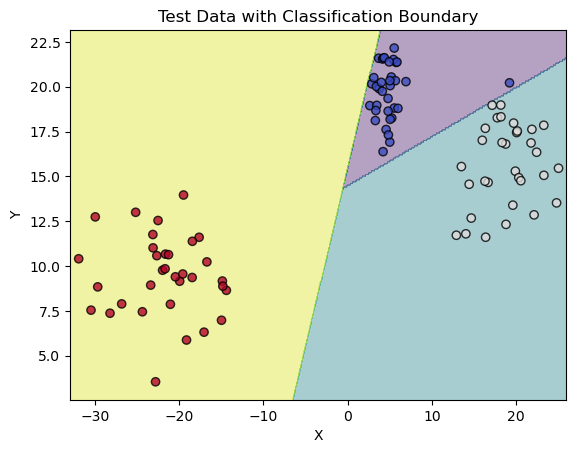

In [11]:
x_min,x_max=X_test[:,0].min()-1,X_test[:,0].max()+1
y_min,y_max=X_test[:,1].min()-1,X_test[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
Z=np.array([naive_bayes_predict((np.array([xi,yi])),1) for xi,yi in zip(xx.ravel(),yy.ravel())])
Z=Z.reshape(xx.shape)
# Define grid of points to plot decision boundary

plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(X_test[:,0],X_test[:,1],c=np.array(predictions_test),alpha=0.8,cmap='coolwarm',edgecolor='k')
plt.title("Test Data with Classification Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Confusion Matrix

In [12]:
def confusion_matrix(y_true,y_pred):
    num_of_classes=len(np.unique(y_true))
    cm=np.zeros((num_of_classes,num_of_classes),dtype=int)
    
    for i in range(num_of_classes):
        for j in range(num_of_classes):
            # for each combination of true class i and pred class j
            temp=np.logical_and(y_true==i , y_pred==j)
            count=np.sum(temp)
            # count the no. of samples where y_true equals i and y_pred equals j
            
            cm[i][j]=count

    return cm

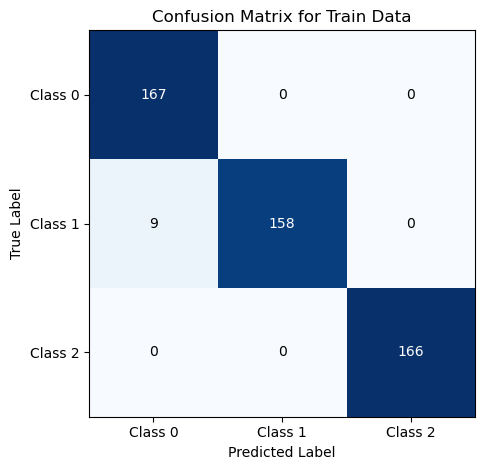

In [13]:
classes = ['Class 0', 'Class 1','Class 2']

conf_train=confusion_matrix(Y_train,np.array(predictions_train))

cm=conf_train

fig,ax=plt.subplots()
im=ax.imshow(cm,cmap='Blues')

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

thresh=cm.max()/2.
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j,i,format(cm[i][j],'g'),
        ha="center",va="center",
        color="white" if cm[i][j]>thresh 
                      else "black")

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix for Train Data")

fig.tight_layout()
plt.show()

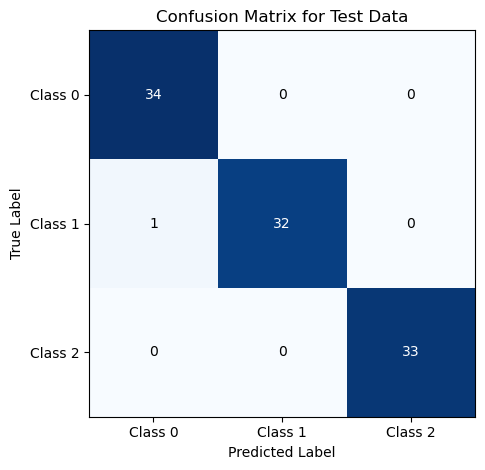

In [14]:
conf_test=confusion_matrix(Y_test,np.array(predictions_test))

cm=conf_test

fig,ax=plt.subplots()
im=ax.imshow(cm,cmap='Blues')

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

thresh=cm.max()/2.
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j,i,format(cm[i][j],'g'),
        ha="center",va="center",
        color="white" if cm[i][j]>thresh 
                      else "black")

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix for Test Data")

fig.tight_layout()
plt.show()